# Analysis and Modelling of Bank Customers on taking Personal Loan
Steps Followed:

1. Import the required Libraries

2. Extract the given dataset

3. Identifying the Missing Values or error in the data

4. Cleaning the data

5. Analysis by plotting box plots/ dist plots

6. Pair Plot of data

7. Finding correlation of data and plotting heatmap

8. Findings based on the heatmap

9. Splitting of data into train and test sets

10. Training and making predictions using classification models - Logistic regression, Naive Bayes and KNN.

11. Evaluating model results, comparing the accuracy of models and conclude the results

# Import required libraries:

In [1]:
import numpy as np # Numerical libraries
import pandas as pd # to handle data in form of rows and columns
import seaborn as sns #importing seaborn for statistical plots
import matplotlib.pyplot as plt # importing ploting libraries
%matplotlib inline 
sns.set()

# Reading the dataset:

In [2]:
# reading the CSV file into pandas dataframe
loan_df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [3]:
# Check top few records to get a feel of the data structure
loan_df.head(50)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


# Analysing the given data set:

In [4]:
loan_df.shape

(5000, 14)

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 546.9 KB


In [6]:
loan_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


From the dataset, the target variable is Personal Loan. Our objective is to predict whether a person is likely to take loan or not.

We can see that the columns ID can be ignored for our model as it doesnt have any impact over the target variable.

Here Family, Personal Loan, Securities Account, CD Account, Online, CreditCard are Categorical variables.

Dependent variables related to Bank are Personal Loan, Securities Account, CD Account, Online, CreditCard.

We can also see that the min value for Experience is -3. The experience cannot be a negative value and it is some error with the data. Lets us see if we need to drop or replace those values.

# Cleaning of data:

In [8]:
loan_df[loan_df['Experience'] < 0]['Experience'].count()

52

There are 52 records with negative experience. Before proceeding we need to clean this error data.

In [9]:
loan_df[loan_df['Experience'] < 0]['Experience']

89     -1
226    -1
315    -2
451    -2
524    -1
536    -1
540    -1
576    -1
583    -1
597    -2
649    -1
670    -1
686    -1
793    -2
889    -2
909    -1
1173   -1
1428   -1
1522   -1
1905   -1
2102   -1
2430   -1
2466   -2
2545   -1
2618   -3
2717   -2
2848   -1
2876   -2
2962   -2
2980   -1
3076   -1
3130   -2
3157   -1
3279   -1
3284   -1
3292   -1
3394   -1
3425   -1
3626   -3
3796   -2
3824   -1
3887   -2
3946   -1
4015   -1
4088   -1
4116   -2
4285   -3
4411   -2
4481   -2
4514   -3
4582   -1
4957   -1
Name: Experience, dtype: int64

The Values shows that the negative values can be because of the typo error in the data. We can take absolute values to the negative numbers. Because, the mean and median for that column seems to around 20, replacing these with mean/median cannot be a right approach.

In [10]:
loan_df['Experience'] = loan_df["Experience"].abs()

In [11]:
loan_df[loan_df['Experience'] < 0]['Experience'].count()

0

In [12]:
loan_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [13]:
loan_df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


By seeing the group by results, nearly 10% of the whole data only opted for loan. So it would be good to see the information for the two categorical data separately. i.e for those who have taken loan and not taken loan.

In [14]:
loan_df0= loan_df.groupby('Personal Loan')
loan_df0 = loan_df0.get_group(0)
loan_df0.shape

(4520, 14)

In [15]:
loan_df0.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4520.0,2512.165487,1448.299331,1.0,1259.75,2518.5,3768.25,5000.0
Age,4520.0,45.367257,11.450427,23.0,35.00,45.0,55.00,67.0
Experience,4520.0,20.165487,11.398146,0.0,10.00,20.0,30.00,43.0
Income,4520.0,66.237389,40.578534,8.0,35.00,59.0,84.00,224.0
ZIP Code,4520.0,93152.428761,2156.949654,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4520.0,2.373451,1.148771,1.0,1.00,2.0,3.00,4.0
CCAvg,4520.0,1.729009,1.567647,0.0,0.60,1.4,2.30,8.8
Education,4520.0,1.843584,0.839975,1.0,1.00,2.0,3.00,3.0
Mortgage,4520.0,51.789381,92.038931,0.0,0.00,0.0,98.00,635.0
Personal Loan,4520.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0


In [16]:
loan_df1= loan_df.groupby('Personal Loan')
loan_df1 = loan_df1.get_group(1)
loan_df1.shape

(480, 14)

In [17]:
loan_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,480.0,2390.650000,1394.393674,10.0,1166.50,2342.0,3566.0000,4981.0
Age,480.0,45.066667,11.590964,26.0,35.00,45.0,55.0000,65.0
Experience,480.0,19.843750,11.582443,0.0,9.00,20.0,30.0000,41.0
Income,480.0,144.745833,31.584429,60.0,122.00,142.5,172.0000,203.0
ZIP Code,480.0,93153.202083,1759.223753,90016.0,91908.75,93407.0,94705.5000,96008.0
Family,480.0,2.612500,1.115393,1.0,2.00,3.0,4.0000,4.0
CCAvg,480.0,3.905354,2.097681,0.0,2.60,3.8,5.3475,10.0
Education,480.0,2.233333,0.753373,1.0,2.00,2.0,3.0000,3.0
Mortgage,480.0,100.845833,160.847862,0.0,0.00,0.0,192.5000,617.0
Personal Loan,480.0,1.000000,0.000000,1.0,1.00,1.0,1.0000,1.0


# Visualisation of data:

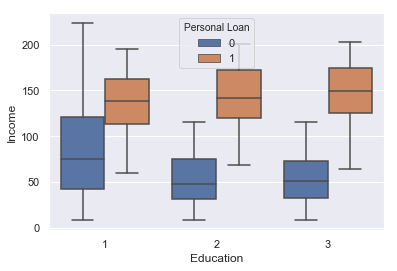

In [18]:
# Lets see the relation between other variables with the target variable
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=loan_df)

We can observe that customer with education level 1 has more income. But the customers who have taken loan seems to be having same income level. We can also see from the groupby information and the boxplot that the customers with more income has taken loans.

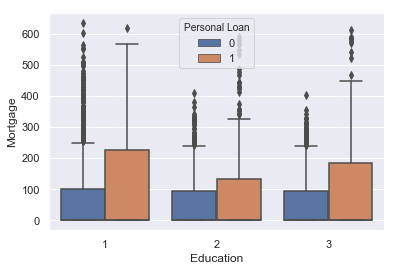

In [19]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=loan_df)

We can observe that customers who have taken loan have high Mortgage.

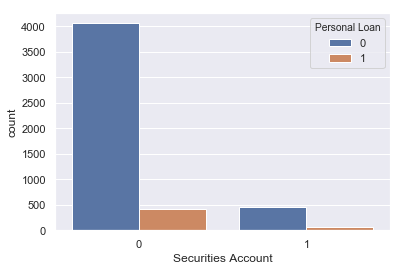

In [20]:
sns.countplot(x="Securities Account", hue="Personal Loan", data=loan_df)

We can observe that customers who have not taken loan have more security accounts.

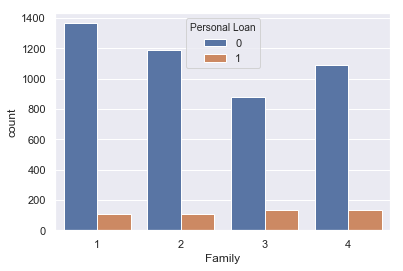

In [21]:
sns.countplot(x="Family", hue="Personal Loan", data=loan_df)

We can observe that count in family doesnt have much impact on the target variable. People who have taken loan in almost same for all family sizes.

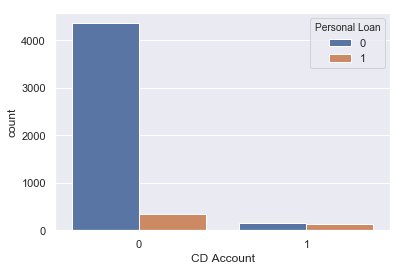

In [22]:
sns.countplot(x="CD Account", hue="Personal Loan", data=loan_df)

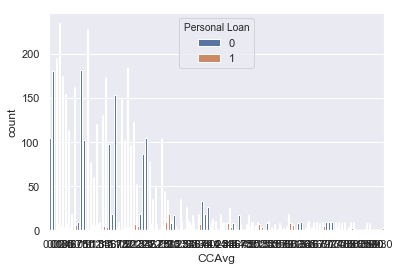

In [23]:
sns.countplot(x="CCAvg", hue="Personal Loan", data=loan_df)

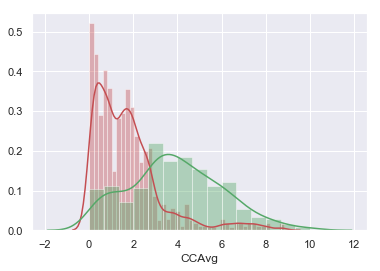

In [24]:
sns.distplot(loan_df0['CCAvg'],color='r')
sns.distplot(loan_df1['CCAvg'],color='G')

We can observe that the customers who have taken personal loan have a higher credit card average.

C:\Users\Sri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Sri\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


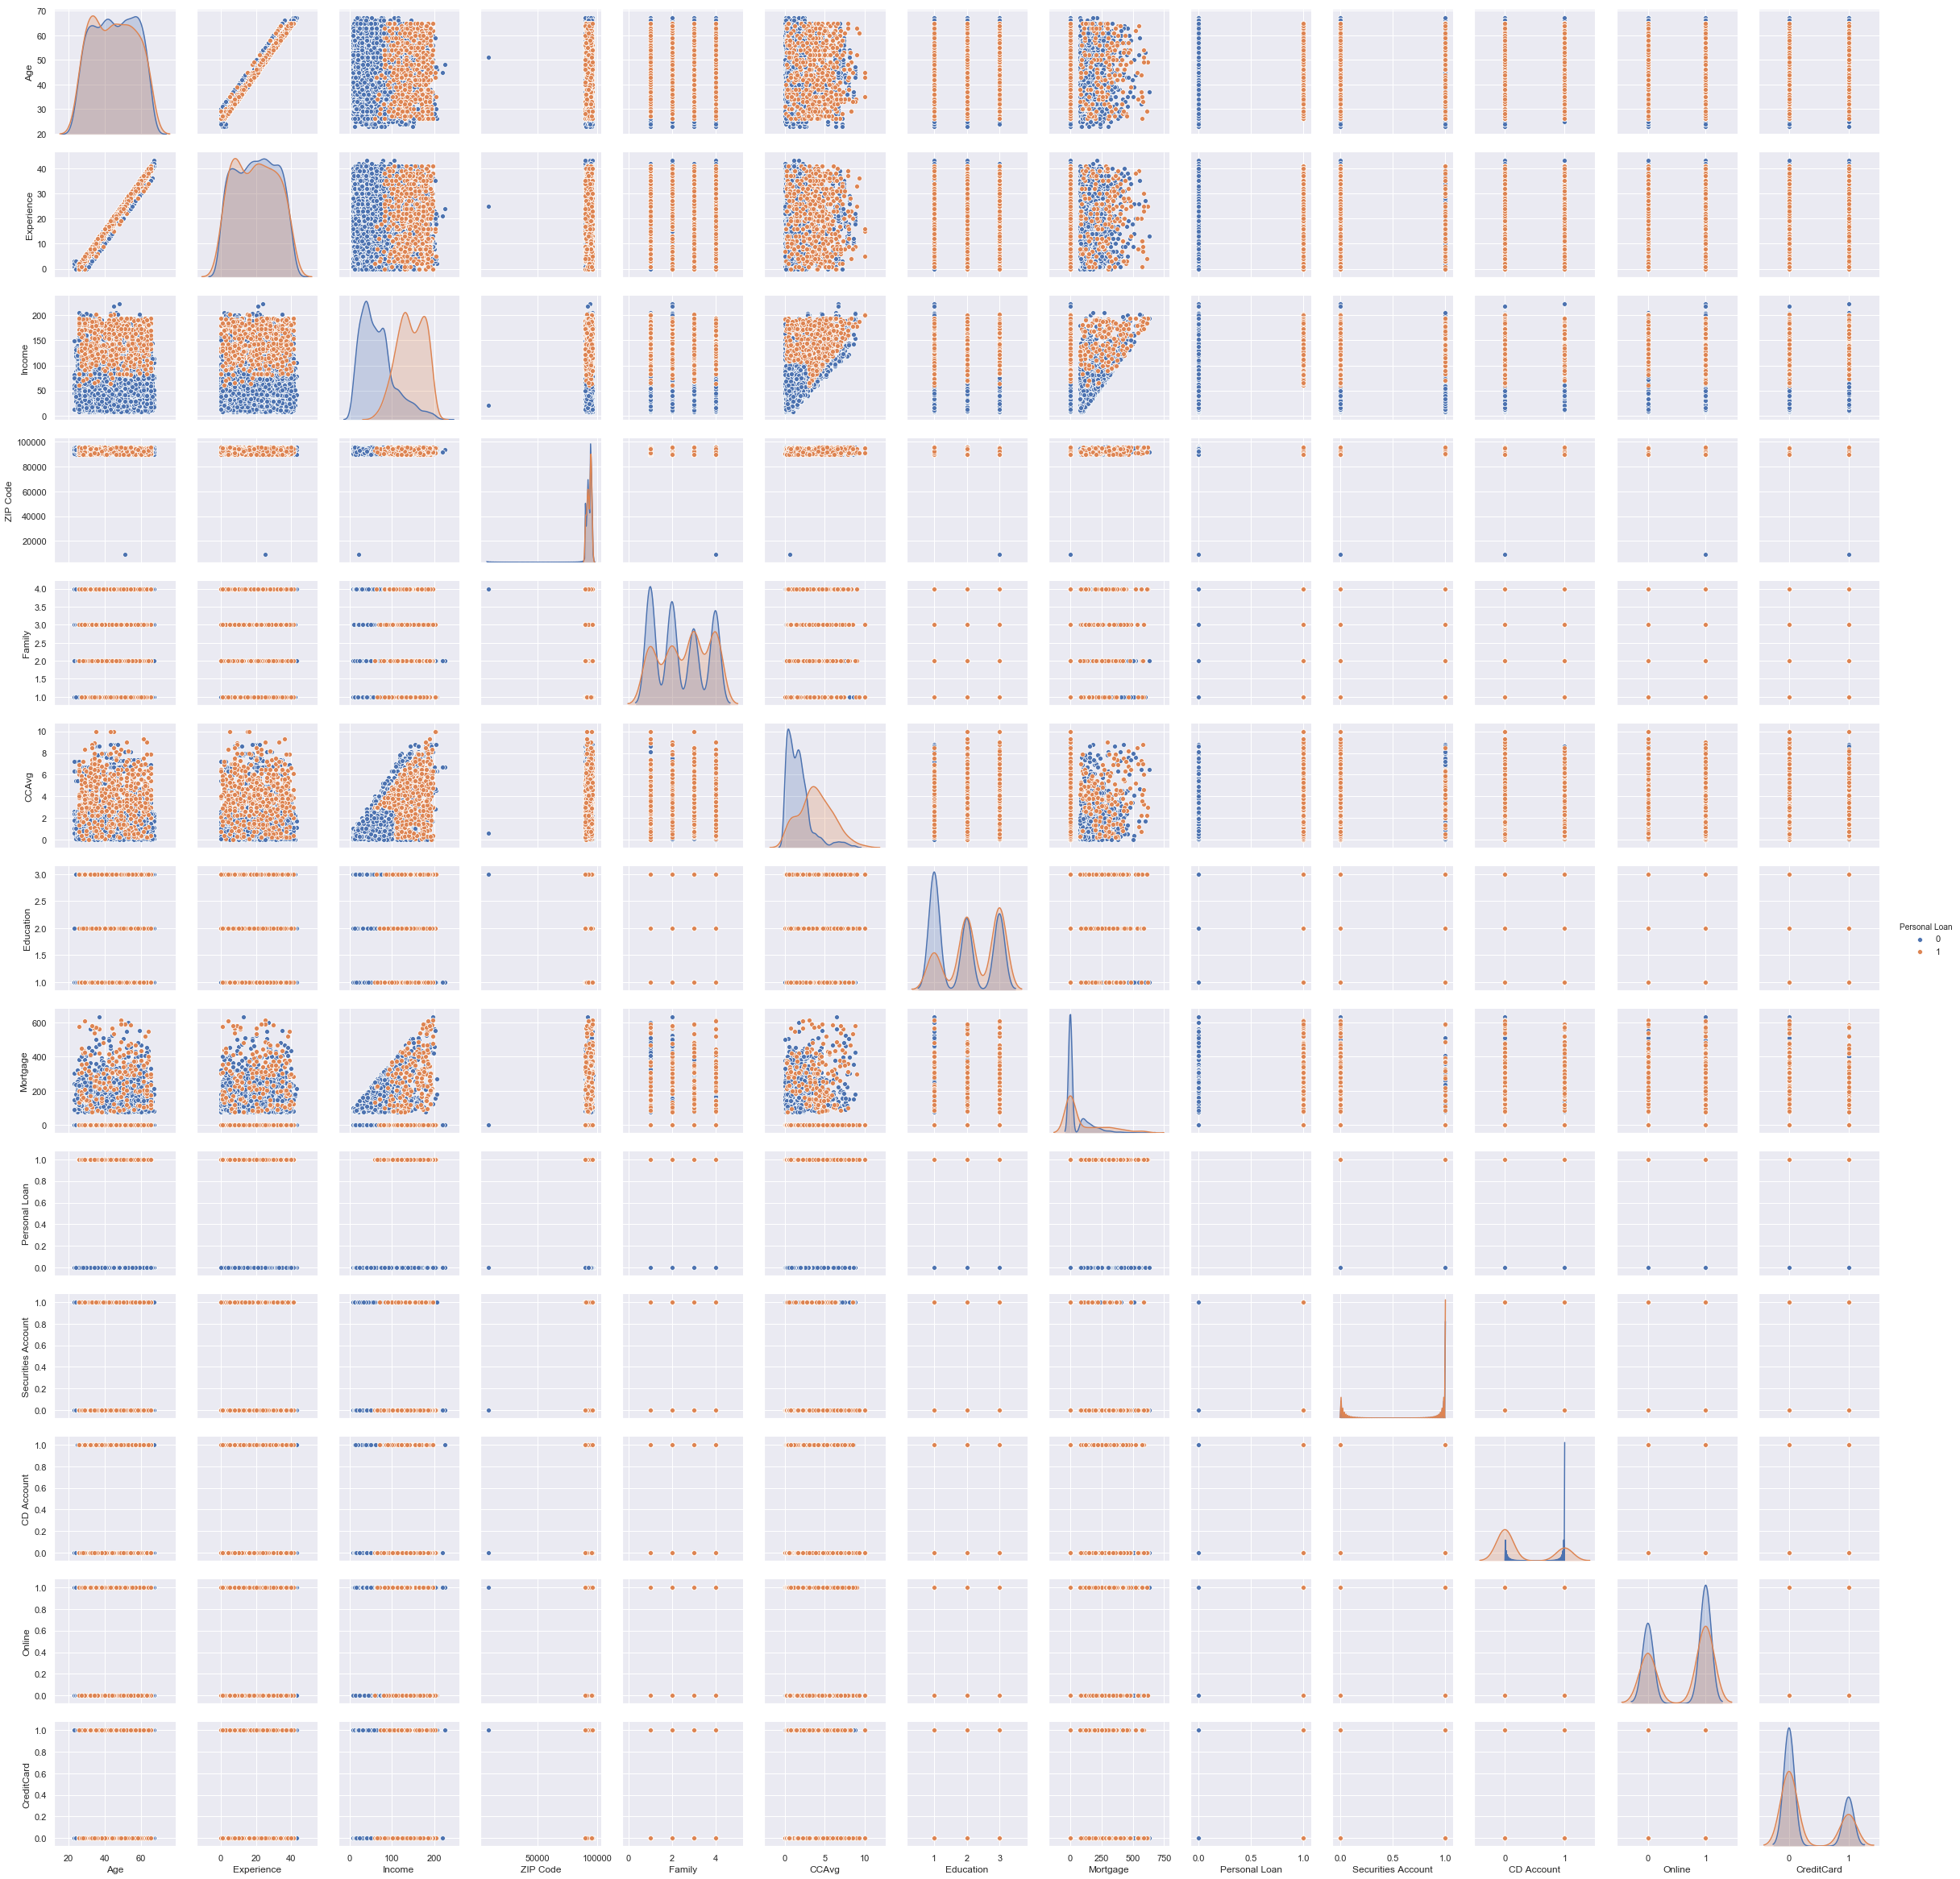

In [25]:
sns.pairplot(loan_df.iloc[:,1:], hue='Personal Loan') # Plotting pairplot between all variables by dropping the variable ID

In [26]:
corr = loan_df.corr()
corr

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008202,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008202,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.017695,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


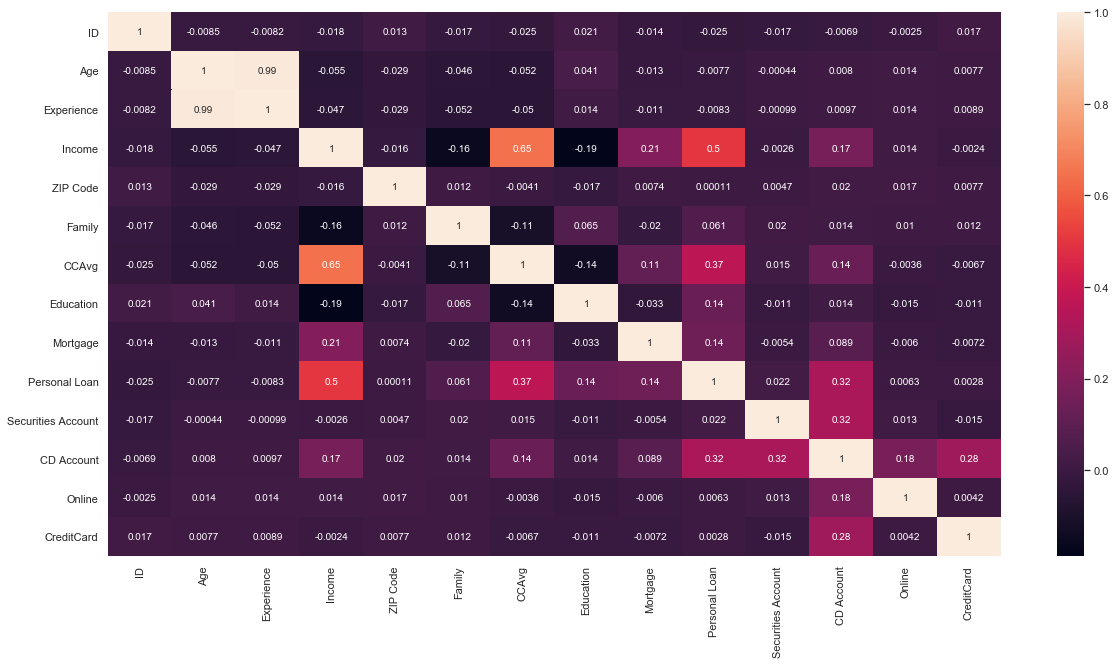

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

Below are the observations from Heatmap:
    1. Age and experience are highly correlated with each other.
    
    2. Personal Loan has maximum correlation with Income, CCAvg, CD Account, Mortgage and Education.
    
    3. CCAvg, Personal Loan, Mortgage, CD Account are dependent on Income.
    
    4. CD Account is dependent on Credit Card, Securities Account, Online, CCAvg and Income.
    
    5. Mortgage is also correlated with Income.

In [28]:
loan_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

# Splitting of Data into Training and Test Datasets:

For splitting the data into training and test sets, we need to separate the Dependent and independent (Target) variables into two different data frames.

Since ID has no impact in the dataset, lets drop the column ID in our datasets.

Here our target variable is Personal Loan. All other variables are dependant variables.

In [29]:
from sklearn.model_selection import train_test_split # # Import Sklearn package's data splitting function
from sklearn import metrics

X = loan_df.drop(['ID','Personal Loan'], axis=1)
y = loan_df['Personal Loan']

In [30]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Logistic Regression Model:

In [31]:
from sklearn.linear_model import LogisticRegression # Import Logistic Regression machine learning library
log_model1 = LogisticRegression()

In [32]:
# Apply training data to the logistic regression model
log_model1.fit(X_train, y_train)

#Predict the test results
y_predict = log_model1.predict(X_test)

C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, log_model1.coef_[0][idx]))

The coefficient for Age is 0.0013690710233244291
The coefficient for Experience is -0.005158886590945444
The coefficient for Income is 0.03737245329966207
The coefficient for ZIP Code is -6.758015476899402e-05
The coefficient for Family is 0.03617203735871245
The coefficient for CCAvg is 0.011540777814068393
The coefficient for Education is 0.042638343897392024
The coefficient for Mortgage is 0.0005632033649228554
The coefficient for Securities Account is 0.002685101867530825
The coefficient for CD Account is 0.011428485683613076
The coefficient for Online is -0.001245199565480977
The coefficient for CreditCard is -0.00034131582741961315


In [34]:
# Let us check the intercept for the model

intercept = log_model1.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.00021201238427919573


In [35]:
# Calculate the model score and print confusion matrix

log_model1_score = log_model1.score(X_test, y_test)
print("The Logistic Regression model accuracy is {}".format(log_model1_score))

The Logistic Regression model accuracy is 0.9026666666666666


In [36]:
print("The confustion matrix for Logistic Regression is")
print(metrics.confusion_matrix(y_test, y_predict))

The confustion matrix for Logistic Regression is
[[1307   53]
 [  93   47]]


From the confusion matrix results, we can see the below observations.

True negative is 1307 & True postive is 47.
False postive is 53 & False negative is 93.


# Scaling of data to improve the accuracy:

In [37]:
## To have an accurate score, let us create another set of data with scaling function applied to it.

from sklearn import preprocessing

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

C:\Users\Sri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [38]:
# Apply Scaled training data to the logistic regression model
log_model2 = LogisticRegression()
log_model2.fit(ZX_train, y_train)

#Predict the test results
y_predict1 = log_model2.predict(ZX_test)

C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [39]:
# Let us explore the coefficients for each of the independent attributes

coef_df = pd.DataFrame(log_model2.coef_)
print(coef_df)

         0         1         2         3         4         5         6   \
0 -0.097332  0.190462  2.436049 -0.026749  0.757365  0.182221  1.343669   

         7         8         9         10        11  
0  0.002137 -0.210683  0.843636 -0.356409 -0.471987  


In [40]:
# Let us check the intercept for the model

intercept1 = log_model2.intercept_[0]

print("The intercept for Logistic Regression model is {}".format(intercept1))

The intercept for Logistic Regression model is -4.4666953396849856


In [41]:
# Calculate the model score

log_model2_score = log_model2.score(ZX_test, y_test)
print("The Logistic Regression model accuracy with scaled data is {}".format(log_model2_score))

The Logistic Regression model accuracy with scaled data is 0.9526666666666667


In [42]:
# Print confusion matrix

print("The confustion matrix for Logistic Regression with scaled data is")
print(metrics.confusion_matrix(y_test, y_predict1))

The confustion matrix for Logistic Regression with scaled data is
[[1339   21]
 [  50   90]]


Now the model accuracy for Logistic Regression with scaled data is 95.266%

True Postive is 90 & True negative is 1339.

False Postive is 21 & False nrgative is 50.

# Linear Regression Model:

In [43]:
from sklearn.linear_model import LinearRegression # Import Linear Regression machine learning library
linear_model1 = LinearRegression()
linear_model1.fit(X_train, y_train)
y_predict_linear = linear_model1.predict(X_test)
coef_df = pd.DataFrame(linear_model1.coef_)
print(coef_df)

linear_model1_score = linear_model1.score(X_test, y_test)
print("The Linear Regression model accuracy is {}".format(linear_model1_score))

               0
0  -4.163771e-03
1   4.650635e-03
2   3.124704e-03
3   1.630496e-07
4   3.170568e-02
5   1.030294e-02
6   8.095299e-02
7   6.657144e-05
8  -5.511822e-02
9   3.326123e-01
10 -2.922510e-02
11 -5.023215e-02
The Linear Regression model accuracy is 0.36115707605798264


In [44]:
linear_model2 = LinearRegression()
linear_model2.fit(ZX_train, y_train)
y_predict1_linear = linear_model2.predict(X_test)
coef_df = pd.DataFrame(linear_model2.coef_)
print(coef_df)

linear_model2_score = linear_model2.score(ZX_test, y_test)
print("The Linear Regression model accuracy with scaled data is {}".format(linear_model2_score))

           0
0  -0.047725
1   0.053083
2   0.143827
3   0.000346
4   0.036384
5   0.018004
6   0.067983
7   0.006771
8  -0.016854
9   0.079237
10 -0.014336
11 -0.022885
The Linear Regression model accuracy with scaled data is 0.36115707605798264


# Naive Bayes Model:

In [45]:
from sklearn.naive_bayes import GaussianNB

naive_model1 = GaussianNB()
naive_model1.fit(X_train,y_train)
y_predict_naive = naive_model1.predict(X_test)

In [46]:
naive_model1_score = naive_model1.score(X_test, y_test)
print("The Naive Bayes model accuracy is {}".format(naive_model1_score))

The Naive Bayes model accuracy is 0.8853333333333333


In [47]:
print(metrics.confusion_matrix(y_test, y_predict_naive))

[[1242  118]
 [  54   86]]


True Postive is 86 & True Negative is 1242.

False Postive is 118 & False negative is 54.

In [48]:
naive_model2 = GaussianNB()
naive_model2.fit(ZX_train,y_train)
y_predict1_naive = naive_model2.predict(ZX_test)
naive_model2_score = naive_model2.score(ZX_test, y_test)
print("The Naive Bayes model accuracy is {}".format(naive_model2_score))
print(metrics.confusion_matrix(y_test, y_predict1_naive))

The Naive Bayes model accuracy is 0.8786666666666667
[[1234  126]
 [  56   84]]


Now the Naive Bayes model accuracy with scaled dataset is 87.86%

True Postive is 84 & True Negative is 1234.

False Postive is 126 & False negative is 56.

# K - Nearest Neighbors Model:

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn_model1= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
knn_model1.fit(X_train, y_train)
y_pred_knn = knn_model1.predict(X_test)
knn_model1_score = knn_model1.score(X_test, y_test)
print("The KNN model accuracy is {}".format(knn_model1_score))
print("The confusion matrix of KNN model is")
print(metrics.confusion_matrix(y_test,y_pred_knn))

The KNN model accuracy is 0.884
The confusion matrix of KNN model is
[[1285   75]
 [  99   41]]


Here True Postive is 41 & True Negative is 1285.

False Postive is 75 & False negative is 99.

In [50]:
knn_model2= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
knn_model2.fit(ZX_train, y_train)
y_pred1_knn = knn_model2.predict(ZX_test)
knn_model2_score = knn_model2.score(ZX_test, y_test)
print("The KNN model accuracy with scaled data is {}".format(knn_model2_score))
print("The confusion matrix of KNN model is")
print(metrics.confusion_matrix(y_test,y_pred1_knn))

The KNN model accuracy with scaled data is 0.96
The confusion matrix of KNN model is
[[1349   11]
 [  49   91]]


Here True Postive is 91 & True Negative is 1349.

False Postive is 11 & False negative is 49.

# Comparision of Models:

In [51]:
print("Accuracy of models before scaling:")
print("Logistic Regression model: {}".format(log_model1_score))
print("Linear Regression model: {}".format(linear_model1_score))
print("Naive Bayes model: {}".format(naive_model1_score))
print("KNN model: {}".format(knn_model1_score))

Accuracy of models before scaling:
Logistic Regression model: 0.9026666666666666
Linear Regression model: 0.36115707605798264
Naive Bayes model: 0.8853333333333333
KNN model: 0.884


In [52]:
print("Accuracy of models with scaled dataset:")
print("Logistic Regression model: {}".format(log_model2_score))
print("Linear Regression model: {}".format(linear_model2_score))
print("Naive Bayes model: {}".format(naive_model2_score))
print("KNN model: {}".format(knn_model2_score))

Accuracy of models with scaled dataset:
Logistic Regression model: 0.9526666666666667
Linear Regression model: 0.36115707605798264
Naive Bayes model: 0.8786666666666667
KNN model: 0.96


From the above models, Linear regression cannot be recommended for this data.

We can see that the KNN model has more accuracy of around 96%.

It also has the least values for False Postive and False negative.

KNN model is the recommended one from the above models to predict the customers who are more likely to get a Personal loan.